# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import mplleaflet
import pandas as pd
import numpy as np
import datetime

def leaflet_plot_stations(binsize, hashid):

    df = pd.read_csv('data/C2A2_data/BinSize_d{}.csv'.format(binsize))

    station_locations_by_hash = df[df['hash'] == hashid]

    lons = station_locations_by_hash['LONGITUDE'].tolist()
    lats = station_locations_by_hash['LATITUDE'].tolist()

    plt.figure(figsize=(8,8))

    plt.scatter(lons, lats, c='r', alpha=0.7, s=200)

    return mplleaflet.display()

leaflet_plot_stations(400,'fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89')

In [58]:
# read data
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
df['Date_parse']=pd.to_datetime(df['Date'], format='%Y-%m-%d') # parse date to datetime object
df = df.sort_values('Date_parse') # sort according to date

df['DayOfYear'] = df['Date_parse'].dt.strftime('%m-%d')
df['Year'] = df['Date_parse'].dt.year

df['Data_Value'] = df['Data_Value']/10 # turn data readings to temp

df.drop('Date', axis=1, inplace = True) # drop useless column
df = df[df.DayOfYear != '02-29'] # drop leap year day

#df_2015 = df[(df['Year'] == 2015)] # select 2015
#df = df[(df['Date_parse']>=start)&(df['Date_parse']<=end)] # select 2005 - 2014

In [59]:
max_temp = df[(df.Year >=2005) & (df.Year < 2015) & (df.Element == 'TMAX')].groupby('DayOfYear')['Data_Value'].max()
min_temp = df[(df.Year >=2005) & (df.Year < 2015) & (df.Element == 'TMIN')].groupby('DayOfYear')['Data_Value'].min()

In [60]:
# merge dataframe with max and min temp according to date
df = df.merge(max_temp.reset_index(drop=False).rename(columns={'Data_Value':'Max_temp'}),on='DayOfYear', how='left')
df = df.merge(min_temp.reset_index(drop=False).rename(columns={'Data_Value':'Min_temp'}),on='DayOfYear', how='left')

In [61]:
# detect record high and record low
record_high = df[(df.Year == 2015)&(df.Data_Value > df.Max_temp)]
record_low = df[(df.Year == 2015)&(df.Data_Value < df.Min_temp)]

In [62]:
# Create X-axis for 2015
X = np.arange('2015-01-01','2016-01-01', dtype='datetime64[D]')

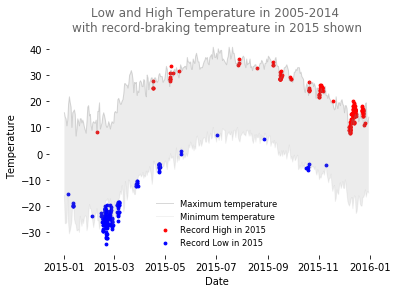

In [96]:
plt.figure()

# plot line graph
plt.plot(X, max_temp, label = 'Maximum temperature', color = 'grey', alpha = 0.3, linewidth =1)
plt.plot(X, min_temp, label = 'Minimum temperature', color = 'grey', alpha = 0.1, linewidth =1)

# plot 2015 scatter plot
plt.scatter(record_high.Date_parse.values, record_high.Data_Value.values, color='r', marker='o', s=8, label='Record High in 2015')
plt.scatter(record_low.Date_parse.values, record_low.Data_Value.values, color='b', marker='o', s=8, label='Record Low in 2015')

# shade the area between max_temp and min_temp
plt.fill_between(X, max_temp, min_temp, facecolor='grey', alpha=0.15)

# Invisible frame
for spine in plt.gca().spines.values():
    spine.set_visible(False)

# set title, axis title
plt.title('Low and High Temperature in 2005-2014 \nwith record-braking tempreature in 2015 shown', alpha=0.6)
plt.xlabel('Date')
plt.ylabel('Temperature')

# legend
plt.legend(loc=0, fontsize='small', frameon=False)

plt.show()